In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/00-crash_reporting_incidents.csv', low_memory = False)

In [4]:
data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP3119001T,190047416,Montgomery County Police,Property Damage Crash,10/03/2019 11:30:00 AM,No,County,0.94,North,North,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.172548,-77.203174,"(39.17254783, -77.203174)"
1,MCP9428002D,190047394,Montgomery County Police,Property Damage Crash,10/03/2019 09:50:00 AM,No,County,1.92,North,South,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.253445,-77.275482,"(39.253445, -77.27548167)"
2,MCP27260043,190047395,Montgomery County Police,Property Damage Crash,10/03/2019 09:28:00 AM,Yes,County,0.78,East,West,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.053780,-77.099195,"(39.05378023, -77.0991953)"
3,MCP91300088,190047384,Montgomery County Police,Property Damage Crash,10/03/2019 09:03:00 AM,Yes,US (State),2.72,North,South,...,CURB,NON INTERSECTION,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.019415,-77.013685,"(39.019415, -77.013685)"
4,MCP1119007N,190047378,Montgomery County Police,Property Damage Crash,10/03/2019 08:06:00 AM,No,Maryland (State),4.81,North,South,...,NaN,INTERSECTION RELATED,FOUR-WAY INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.059683,-77.051695,"(39.05968333, -77.051695)"


In [7]:
data.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point',
       'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Lane Type',
       'Number of Lanes', 'Direction', 'Distance', 'Distance Unit',
       'Road Grade', 'NonTraffic', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'At Fault', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck',
       'Junction', 'Intersection Type', 'Intersection Area', 'Road Alignment',
       'Road Condition', 'Road Division', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [22]:
data['First Harmful Event'].value_counts()

OTHER VEHICLE                     32871
FIXED OBJECT                       5687
PARKED VEHICLE                     4546
PEDESTRIAN                         1844
OFF ROAD                            537
ANIMAL                              445
BICYCLE                             413
OTHER OBJECT                        342
OTHER                               152
OVERTURN                            125
UNKNOWN                              84
BACKING                              70
OTHER NON COLLISION                  62
OTHER CONVEYANCE                     39
THROWN OR FALLING OBJECT             22
FELL JUMPED FROM MOTOR VEHICLE       21
OTHER PEDALCYCLE                     19
DOWNHILL RUNAWAY                     13
SPILLED CARGO                        12
U-TURN                                6
RAILWAY TRAIN                         5
JACKKNIFE                             4
UNITS SEPARATED                       4
EXPLOSION OR FIRE                     4
IMMERSION                             1


In [13]:
data['Weather'].value_counts()

CLEAR                       31016
RAINING                      6041
CLOUDY                       4996
SNOW                          493
UNKNOWN                       305
FOGGY                         207
WINTRY MIX                    125
OTHER                         118
SLEET                          58
SEVERE WINDS                   50
BLOWING SNOW                   26
BLOWING SAND, SOIL, DIRT        4
Name: Weather, dtype: int64

In [14]:
contingency_table = pd.crosstab(
    data['ACRS Report Type'],
    data['Weather'],
    margins = True
)
contingency_table

Weather,"BLOWING SAND, SOIL, DIRT",BLOWING SNOW,CLEAR,CLOUDY,FOGGY,OTHER,RAINING,SEVERE WINDS,SLEET,SNOW,UNKNOWN,WINTRY MIX,All
ACRS Report Type,,,,,,,,,,,,,
Fatal Crash,0,0,91,8,0,0,10,0,0,0,0,0,109
Injury Crash,2,8,11124,1863,72,37,2293,19,22,154,28,38,15660
Property Damage Crash,2,18,19801,3125,135,81,3738,31,36,339,277,87,27670
All,4,26,31016,4996,207,118,6041,50,58,493,305,125,43439


In [36]:
data['Weather'].isna().sum()

4153

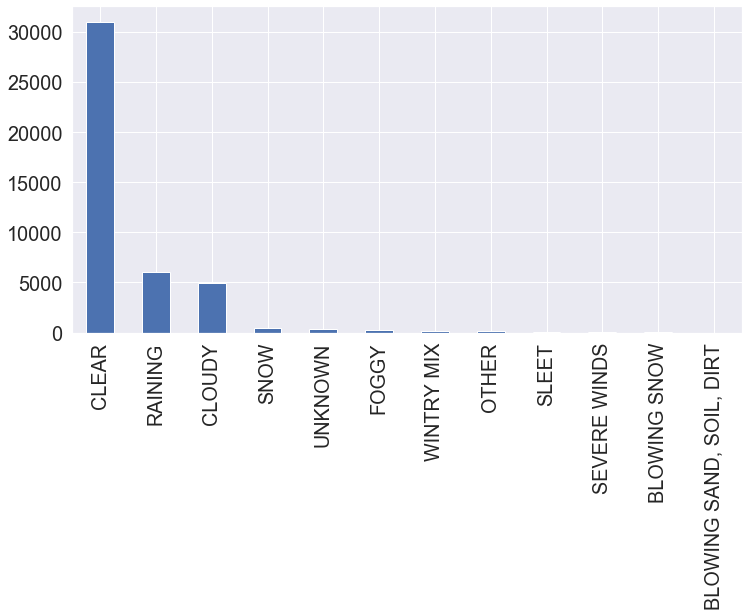

In [52]:
data['Weather'].value_counts().plot(kind = 'bar', figsize = (12, 6))

In [40]:
# Import required modules
import pandas as pd
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

In [48]:
x = data['Weather'].value_counts()

In [55]:
data = {'Weather' : [31016, 6041, 4998, 493, 305, 207, 125, 118, 58, 50, 26, 4]}
df = pd.DataFrame(data)

In [56]:
df

,Weather
0,31016
1,6041
2,4998
3,493
4,305
5,207
6,125
7,118
8,58
9,50


In [58]:
# Create x, where x the 'scores' column's values as floats
x = df[['Weather']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [59]:
df_normalized

,0
0,1.000000
1,0.194667
2,0.161034
3,0.015768
4,0.009706
5,0.006546
6,0.003902
7,0.003676
8,0.001741
9,0.001483


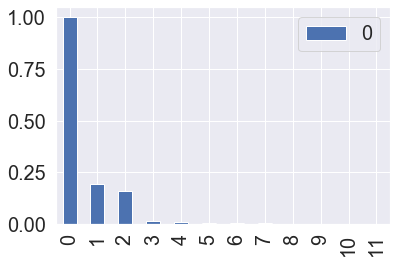

In [60]:
df_normalized.plot(kind = 'bar')